In [74]:
#Importing necessary libraries:
from sklearn.datasets import load_iris
from sklearn import tree
import seaborn as sns
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import graphviz
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#Iris dataset:
iris = pd.read_csv("D:/Machine Learning Practical/Lab Exercises/LAB 6/iris.csv")
iris=iris.drop(["Unnamed: 0"],axis=1)
iris.iloc[52]

Sepal.Length           6.9
Sepal.Width            3.1
Petal.Length           4.9
Petal.Width            1.5
Species         versicolor
Name: 52, dtype: object

## NAIVE BAYES METHOD

In [58]:
#Changinf response variable to 0,1,2

for i in range(len(iris)):
    if( iris["Species"][i]=="setosa"):
        iris["Species"][i]=int(0)
    if( iris["Species"][i]=="virginica"):
        iris["Species"][i]=int(2)
    if( iris["Species"][i]=="versicolor"):
        iris["Species"][i]=int(1)

iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species         float64
dtype: object

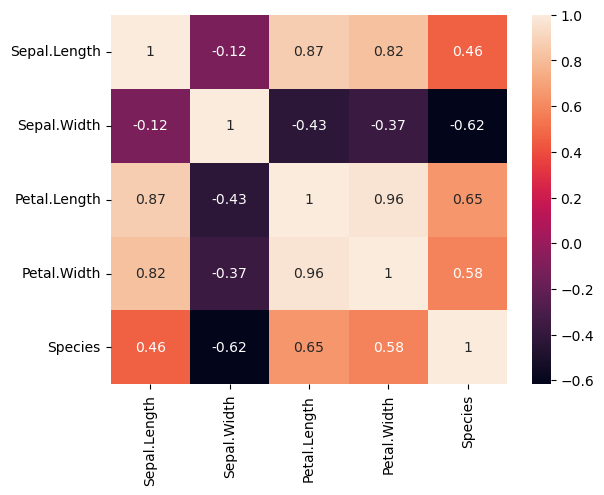

In [60]:
iris["Species"]=iris["Species"].astype(float)
#Feature Selection
corr=iris.corr(method='pearson')
sns.heatmap(corr,annot=True)

#We see that there is moderate correlation between all regressors. Since Multicollinearity exist we will use Naive Bayes Method.

In [64]:
from sklearn.preprocessing import StandardScaler

#Training and Testing
X=pd.DataFrame(iris.drop(["Species"],axis=1))
y=pd.DataFrame(iris["Species"])


#Normalizing the data
scalar=StandardScaler()
X=pd.DataFrame(scalar.fit_transform(X))

#Train and Test Data
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=1)

#### Using Gausian Naive Baye's

In [82]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#model
model=GaussianNB().fit(X_train, y_train)

#prediction
y_pred = model.predict(X_test)

#Error rate for Naive Bayes
test_error_naive= 1 - model.score(X_test,y_test)
test_error_naive

#Testing Accuracy
print("The Testing Accuracy for Naive bayes is: ",accuracy_score(y_test,y_pred))

The Testing Accuracy for Naive bayes is:  0.9333333333333333


C:\Users\jesto\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## DECISION TREE METHOD

In [76]:
#Fitting the decision tree classifier:
a = tree.DecisionTreeClassifier()
clf = a.fit(X_train, y_train)

In [78]:
#fINDING THE BEST MODEL
for i in range(1,10):
      
      clf = tree.DecisionTreeClassifier(max_depth=i).fit(X_train,y_train)
      print("Training score for max depth",i,"is: ",clf.score(X_train, y_train),"\n")
      print("Testing score for max depth",i,"is: ",clf.score(X_test, y_test),"\n")

Training score for max depth 1 is:  0.6952380952380952 

Testing score for max depth 1 is:  0.6 

Training score for max depth 2 is:  0.9619047619047619 

Testing score for max depth 2 is:  0.9555555555555556 

Training score for max depth 3 is:  0.9809523809523809 

Testing score for max depth 3 is:  0.9555555555555556 

Training score for max depth 4 is:  1.0 

Testing score for max depth 4 is:  0.9555555555555556 

Training score for max depth 5 is:  1.0 

Testing score for max depth 5 is:  0.9555555555555556 

Training score for max depth 6 is:  1.0 

Testing score for max depth 6 is:  0.9555555555555556 

Training score for max depth 7 is:  1.0 

Testing score for max depth 7 is:  0.9555555555555556 

Training score for max depth 8 is:  1.0 

Testing score for max depth 8 is:  0.9555555555555556 

Training score for max depth 9 is:  1.0 

Testing score for max depth 9 is:  0.9555555555555556 



Note: We see that for Max Depth =3 , we get the optimal accuracy without overfitting. Hence that is the best model.

In [79]:
#Fitting the best model
a= tree.DecisionTreeClassifier(max_depth=3)
clf_best = a.fit(X_train, y_train)

#Training and testing accuracy
print("The Training Accuracy is : ",clf_best.score(X_train, y_train))
print("The Testing Accuracy is : ",clf_best.score(X_test, y_test))

The Training Accuracy is :  0.9809523809523809
The Testing Accuracy is :  0.9555555555555556


### Conclusion: Hence we see that the Testing Accuracy for Decison Tree is better than Naive Bayes  